# <u>Drought Prediction</u>: Exploratory Data Analysis

INSERT INTRODUCTION AND CONTEXT

#### Import neccesary libraries for data exploration.

In [1]:
#Import pandas, matplotlib.pyplot, and seaborn
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

#### Load Training Dataset and Soil Dataset.  Convert Training Dataset date variable from object to datetime.

In [4]:
# Local location of the data
# local_data = 'D:\\Data_Science\\DroughtProject\\Data\\' # Location on Windows
local_data = '/Users/tanishalohchab/Downloads/drought_prediction-main/dataset/' # Location on Linux
#the data set is large and hence found other ways to load data from hte stackoverflow.
N = 19300680 # number of rows in the training_data_set & the merge.
N1 = int(N/2)


#### Confirm datasets are properly loaded and contain expected datatypes.

In [5]:
ts_merge0 = pd.read_csv(local_data + 'train_soil_merge.csv', skiprows=[i for i in range(N1,N-1)])

In [6]:
# Convert date column from object to datetime for training set.
ts_merge0['date'] = pd.to_datetime(ts_merge0['date'])

In [7]:
ts_merge0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9650341 entries, 0 to 9650340
Data columns (total 53 columns):
 #   Column         Dtype         
---  ------         -----         
 0   Unnamed: 0     int64         
 1   fips           int64         
 2   date           datetime64[ns]
 3   PRECTOT        float64       
 4   PS             float64       
 5   QV2M           float64       
 6   T2M            float64       
 7   T2MDEW         float64       
 8   T2MWET         float64       
 9   T2M_MAX        float64       
 10  T2M_MIN        float64       
 11  T2M_RANGE      float64       
 12  TS             float64       
 13  WS10M          float64       
 14  WS10M_MAX      float64       
 15  WS10M_MIN      float64       
 16  WS10M_RANGE    float64       
 17  WS50M          float64       
 18  WS50M_MAX      float64       
 19  WS50M_MIN      float64       
 20  WS50M_RANGE    float64       
 21  score          float64       
 22  lat            float64       
 23  lon    

### Exploration of Training Dataset with PCA.

In [8]:
ts_merge0.columns

Index(['Unnamed: 0', 'fips', 'date', 'PRECTOT', 'PS', 'QV2M', 'T2M', 'T2MDEW',
       'T2MWET', 'T2M_MAX', 'T2M_MIN', 'T2M_RANGE', 'TS', 'WS10M', 'WS10M_MAX',
       'WS10M_MIN', 'WS10M_RANGE', 'WS50M', 'WS50M_MAX', 'WS50M_MIN',
       'WS50M_RANGE', 'score', 'lat', 'lon', 'elevation', 'slope1', 'slope2',
       'slope3', 'slope4', 'slope5', 'slope6', 'slope7', 'slope8', 'aspectN',
       'aspectE', 'aspectS', 'aspectW', 'aspectUnknown', 'WAT_LAND',
       'NVG_LAND', 'URB_LAND', 'GRS_LAND', 'FOR_LAND', 'CULTRF_LAND',
       'CULTIR_LAND', 'CULT_LAND', 'SQ1', 'SQ2', 'SQ3', 'SQ4', 'SQ5', 'SQ6',
       'SQ7'],
      dtype='object')

In [9]:
features = ['PRECTOT', 'PS', 'QV2M', 'T2M', 'T2MDEW',
       'T2MWET', 'T2M_MAX', 'T2M_MIN', 'T2M_RANGE', 'TS', 'WS10M', 'WS10M_MAX',
       'WS10M_MIN', 'WS10M_RANGE', 'WS50M', 'WS50M_MAX', 'WS50M_MIN',
       'WS50M_RANGE', 'lat', 'lon', 'elevation', 'slope1', 'slope2',
       'slope3', 'slope4', 'slope5', 'slope6', 'slope7', 'slope8', 'aspectN',
       'aspectE', 'aspectS', 'aspectW', 'aspectUnknown', 'WAT_LAND',
       'NVG_LAND', 'URB_LAND', 'GRS_LAND', 'FOR_LAND', 'CULTRF_LAND',
       'CULTIR_LAND', 'CULT_LAND', 'SQ1', 'SQ2', 'SQ3', 'SQ4', 'SQ5', 'SQ6',
       'SQ7']

# Separating out the features
x = ts_merge0.loc[:, features].values

# Separating out the target
y = ts_merge0.loc[:,['score']].values

# Standardizing the features
x = StandardScaler().fit_transform(x)

In [10]:
#define the PCA function

pca = PCA(n_components=12)
components = pca.fit(x)

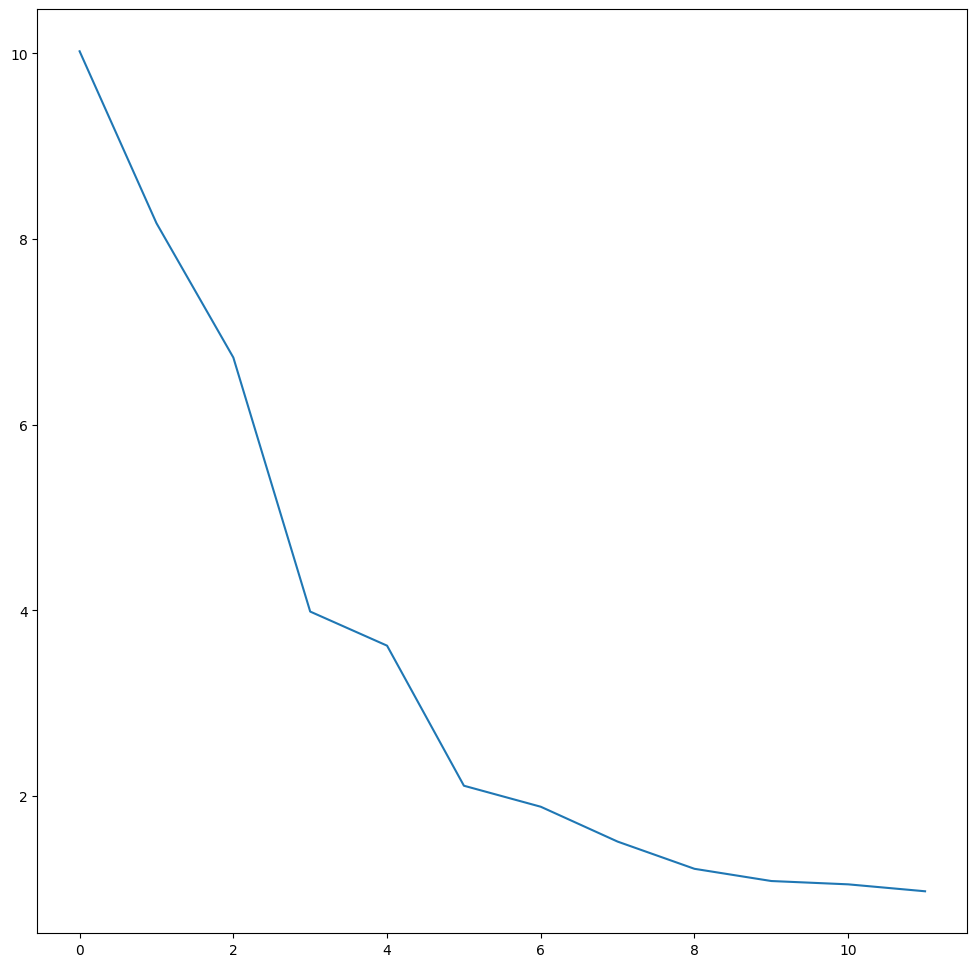

In [11]:
plt.subplots(figsize=(12,12))
plt.plot(components.explained_variance_)

Looking for the 'elbow' in the graph, there appears to be a turn at around 3 & 5 components. 